# Discrete time simulations

Discrete simulations are the most straightforward to implement. After all, software is best expressed as a sequence of discrete manipulations (loops) of discrete data structures (arrays or lists).

In this first part to our Simulation Of Systems, we use simple discrete models to introduce a general family of simulation approaches as well as key concepts from computer science and the study of stochastic processes.

## Discrete agent-based simulation of a discrete model

Consider a simple model of cell division, which is discrete in nature if we track the population of cells found at each generation of their genealogical tree. At each generation, we can assume that active cells may divide with probability $p$ or die without division with complementary probability $1-p$. 

Because of the discrete nature of the model, it seems natural to code it directly by iterating the rule directly. In code-like language, here is what we need to do. For each generation, for each active cell in the generation, create 2 new cells with probability $p$ and remove the current active cell. Since the model is stochastic (random), it may also be useful to also repeat this process a few times to get a few different time series.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_92176/3087340440.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


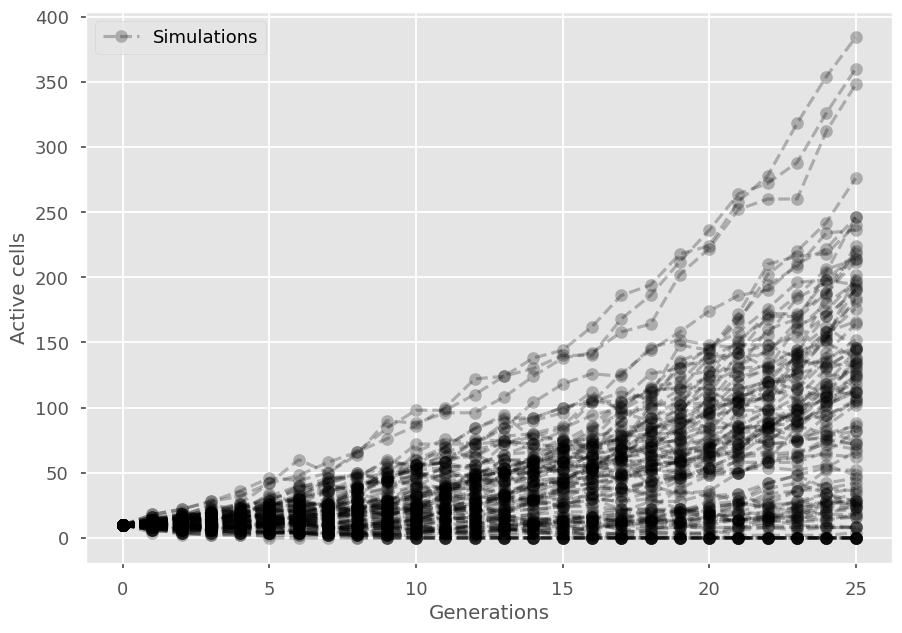

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['ggplot', 'seaborn-talk'])

#parameters
p = 0.55

#for each simulation
for sims in range(100):
    active_cells = 10
    history = np.full(1,10)
    #for each generation
    for t in range(25):
        #for each active cell
        for cell in range(active_cells):
            #test division
            if random.random() < p:
                active_cells += 2
            #remove active cell either way
            active_cells -= 1
        #update history
        history = np.append(history, active_cells)
    #print time series
    plt.plot(np.arange(len(history)),history, marker="o", ls='--', color='black', alpha=0.25)
    
#Add null simulation with label in legend and label the axes
plt.plot(0,10, marker="o", ls='--', color='black', alpha=0.25, label='Simulations')
plt.legend()
plt.ylabel('Active cells')
plt.xlabel('Generations')
plt.show()


:::{tip}
Often, we can simulate complex stochastic processes using simply our ability to generate random numbers uniformly between 0 and 1. This is exactly what the random.random() function does in the code above. In this particular case, we need to accept an event with probability $p$. We do so by simply asking if a random number between 0 and 1 is less than $p$. Think of it as throwing a dart at random on a map to decide which country travel to visit, and the country will therefore be chosen proportionally to its size. Here, the size of the event is its probability of occuring and our random number indicates where our dart lands; either accepting the event with probability $p$, or rejecting it with probability $1-p$.
:::

## Discrete composition of a discrete model

Now that we know how to produce simple stochastic simulations, the goal is to make them faster and better. Of course, the ways to do that will depend on the nature of the model. We will see how to deal with continuous time models, spatial models, and network models, eventually. But in all of those, it will remain important to keep one goal in mind: The fewer random numbers we need to generate while exactly tracking the model, the faster our algorithm.

The general intuition we need to develop relates to the importance of **composition**. All events that follow the same mechanics can be considered together. In the simple cell division model above, there is no need to know exactly which cell is dividing but only *how many* are dividing within a generation. If there are $N$ active cells, and each of them lead to division than probability $p$, then number of divisions is drawn from a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) for the number of successes in $N$ [Bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial) with probability of success $p$.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_92176/2164217878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


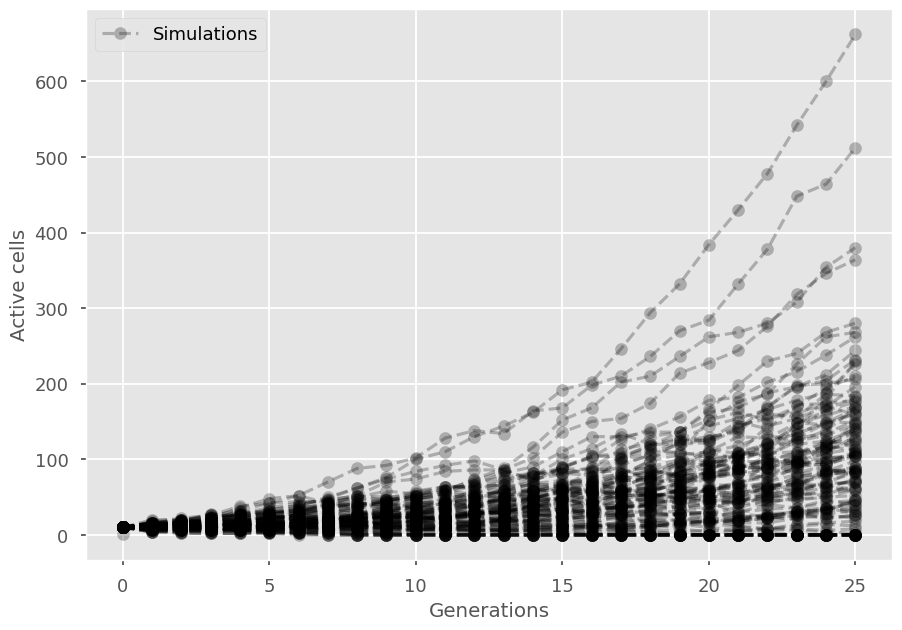

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['ggplot', 'seaborn-talk'])

#parameters
p = 0.55

#for each simulation
for sims in range(100):
    active_cells = 10
    history = np.full(1,10)
    #for each generation
    for t in range(25):
        #calculate the number of divisions
        divisions = np.random.binomial(active_cells, p)
        #remove active cells
        active_cells = 0
        #add new cells
        active_cells += 2*divisions
        #update history
        history = np.append(history, active_cells)
    #print time series
    plt.plot(np.arange(len(history)),history, marker="o", ls='--', color='black', alpha=0.25)
    
#Add null simulation with label in legend and label the axes
plt.plot(0,1, marker="o", ls='--', color='black', alpha=0.25, label='Simulations')
plt.legend()
plt.ylabel('Active cells')
plt.xlabel('Generations')
plt.show()

## Complexity of stochastic simulations

The complexity of a simulation algorithm is most often calculated and reported using [**Big *O* notation**](https://en.wikipedia.org/wiki/Big_O_notation). Under this notation, we simply wish to report the general scaling behavior of our algorithm in terms of the time needed to iterate the rules as a function of system size $N$. Of course, system size can be tricky to define; as for example both the number of nodes and edges will matter for network simulations. It is however straightforward for the cell division model used. We might therefore be interested in calculating the complexity of running a single generation with either an agent-based or composition approach, as a function of the number of active cells.

In theory, we know that the two approaches are similar but the agent-based approach as an extra loop over all active cells. The time needed for an agent-based simulation of cell division should therefore scale linearly with system size. Conversely, in this case, the composition approach runs exactly the same operations regardless of the state of the system and should therefore be constant with system size. To be sure, it is always best to directly compare simulations.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_92176/2537936266.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


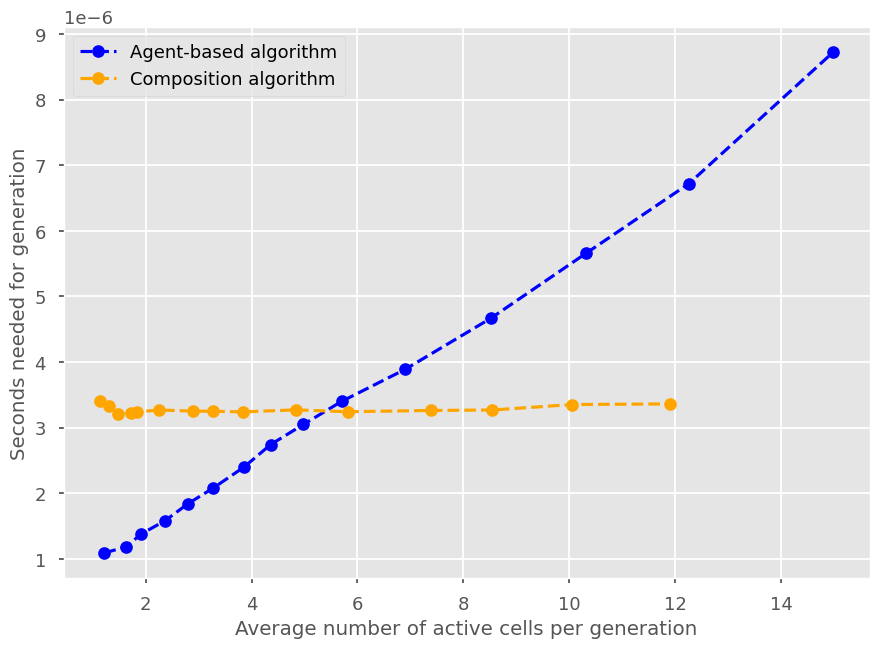

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use(['ggplot', 'seaborn-talk'])

#parameters
p = 0.6

#Agent-based algorithm
active_cells = np.full(100, 1)
time_keeper = np.zeros(1)
history = np.full(1, 1)
#for each generation
for t in range(15):
    start = time.time()
    #for each simulation
    for sims in range(100):
        for cell in range(int(active_cells[sims])):
            #test division
            if random.random() < p:
                active_cells[sims] += 2
            #remove active cell either way
            active_cells[sims] -= 1
    #update time counter
    time_keeper = np.append(time_keeper, (time.time() - start)/100)
    history = np.append(history, np.mean(active_cells))
#print time series
plt.plot(history[1:],time_keeper[1:], marker="o", ls='--', color='blue', label='Agent-based algorithm')

#Composition algorithm
active_cells = np.full(100, 1)
time_keeper = np.zeros(1)
history = np.full(1, 1)
#for each generation
for t in range(15):
    start = time.time()
    #for each simulation
    for sims in range(100):
        #calculate the number of divisions
        divisions = np.random.binomial(active_cells[sims], p)
        #remove active cells
        active_cells[sims] = 0
        #add new cells
        active_cells[sims] += 2*divisions
    #update time counter
    time_keeper = np.append(time_keeper, (time.time() - start)/100)
    history = np.append(history, np.mean(active_cells))
#print time series
plt.plot(history[1:],time_keeper[1:], marker="o", ls='--', color='orange', label='Composition algorithm')
    
#Add legend and label the axes
plt.legend()
plt.ylabel('Seconds needed for generation')
plt.xlabel('Average number of active cells per generation')
plt.show()

Notice that we now start the simulation with a single cell rather than 10 as before. This is to highlight an interesting behavior. The agent-based simulation is faster when there are few active cells. Why could that be? Drawing from a binomial distribution with zero trial might be trivial in practice (as we can't have any success without any trial), but the computer still has to call the function. In turn, the agent-based model skips over any simulation with no active cells. This is not just due to simulations with exactly zero active cells, but any simulation where the overhead of a single draw from a more complicated binomial distribution over $N$ trials is larger than the time needed to directly do $N$ draws from a simple uniform distribution.

## Discrete agent-based simulation of a continuous process

Many of the models of complex systems we see in pratice are defined in continuous times. In part because we believe time to be continuous in nature. And in part because some mechanisms are better defined as occuring at a fixed rates (continuous) rather than occuring with a fixed probability (discrete).

Formally speaking, these models take some system state $x$ and decribe its evolution in time through a differential equation $\frac{dx}{dt} = F(x)$. If that differential equation can be written down, numerical integrators can be used to track the system in time. These extend the current state of the system to the future like so.

$$
x(t+dt) = x(t) + F(x)dt + F'(x)dt^2 + F''(x)dt^3 + \ldots
$$

where $dt$ is an infinitesimal timestep and primes denote derivatives such that the continuous nature of the system is encoded in the higher-order terms $F'(x)dt^2$, $F''(x)dt^3$ and so on.

:::{tip}
Models defined in continuous time are best simulated in continuous time.
:::

It is however common practice to simulate continuous time model with a discrete algorithm. Looking at the generic equation above, we can come up with a discrete approximation to take the system from $x(t)$ at time $t$ to some other state $x(t+dt)$ at time $t+dt$. This requires a few steps. First, we need to pick a $dt$ small enough such that all terms of order $dt^2$ and above are zero. Then, we can interpret $F(x)dt$ as the probability and impact of some changes over a discrete timestep $dt$.

How small should $dt$ be? It needs to at least meet three criteria. Let's think through them using some model where a a cell divides every other day (1/2 days) and dies usually after a month (1/30 days).

1. The timestep $dt$ needs to be small enough such that all rates over $dt$ can be interpreted as probabilities. Thehe timestep needs to be at equal or smaller to the largest rate in the system for the probability of that event to be equal or less than one over a single timestep. In the example above, that's $dt < 2$ days.
2. The timestep $dt$ also needs to be small enough such that the distribution of time to an event is well captured. For example, if we take $dt$ equal to exactly 2 days in the example above, then the particle divides at every single timestep. And the distribution of time between division events is therefore a [delta distribution](https://en.wikipedia.org/wiki/Dirac_delta_function) where divisions always occur after exactly 2 days. This thus fail to capture the stochastic nature of the process. As a rule of thumb, one can aim for the most frequent event to still occur in less than 1% of timesteps.
3. The time $dt$ finally needs to be small enough such that simultaneous events do not occur. The particle should not divide and die within the same timestep. In some models, simultaneous events can lead to important contradictions. Here, simultaneous cell divisions and cell death would mean that the number of cells can remain constant even when events occur. Again, that is not allowed by the model. As a rule of thumb, one can aim for events on a single agent to co-occur less than one in a million to avoid significant effects.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_92176/3223443005.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


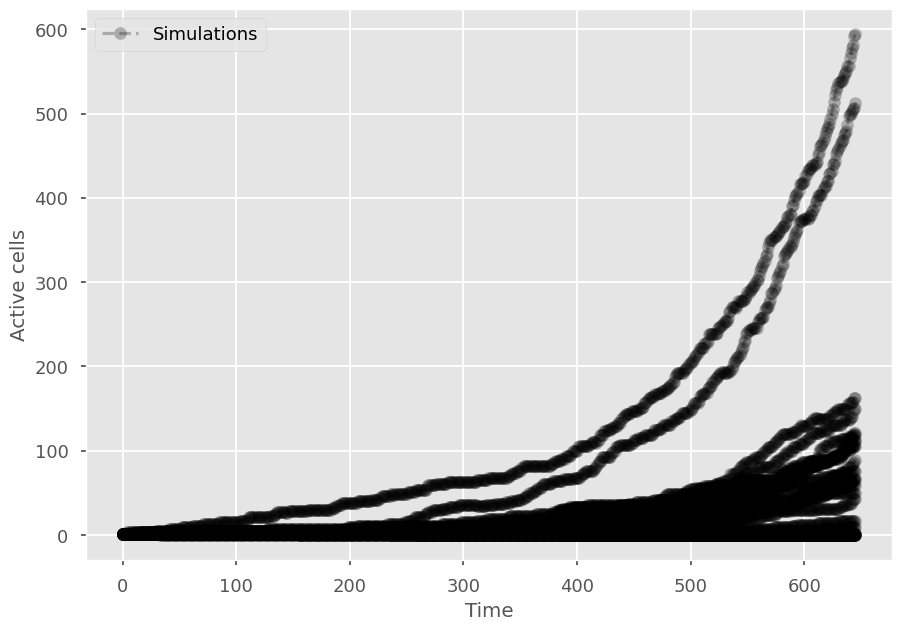

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['ggplot', 'seaborn-talk'])

#parameters
P_division = 1/2
P_death = 1/30

#Pick timestep based on parameters and the criteria above
dt = np.min([1e-2/np.max([P_division, P_death]), np.sqrt(1e-6/(P_division*P_death))])

#for each simulation
for sims in range(25):
    active_cells = 1
    history = np.ones(1)
    #for each generation
    for t in range(int(5/dt)):
        #for each active cell
        for cell in range(active_cells):
            #test division
            if random.random() < P_division*dt:
                active_cells += 2
            #test death
            if random.random() < P_death*dt:
                active_cells -= 1
        #update history
        history = np.append(history, active_cells)
    #print time series
    plt.plot(np.arange(len(history)),history, marker="o", ls='--', color='black', alpha=0.25)
    
#Add null simulation with label in legend and label the axes
plt.plot(0,1, marker="o", ls='--', color='black', alpha=0.25, label='Simulations')
plt.legend()
plt.ylabel('Active cells')
plt.xlabel('Time')
plt.show()

:::{tip}
This code would quickly become unusable since it slows down as the system grows. It would be important to consider a composition approach as described above. Or, even better, use a continuous time algorithm since this is a continuous model!
:::